In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$\frac{dx}{dt} = x \cdot (a - by)$

$\frac{dy}{dt} = -y \cdot (c - dx)$

# Solve using `Scipy`

In [2]:
# System of ODEs
def odes(state, t):
    # Constants
    a = 1.0
    b = 0.2
    c = 0.3
    d = 0.4
    # Extract the x and y components of the state vector
    x, y = state
    # define the ODEs
    dxdt = x * (a - b * y)
    dydt = -y * (c - d * x)
    return [dxdt, dydt]

In [3]:
# Initial conditions
initial_state = [1.0, 1.0]

# Time points
t = np.linspace(0, 10, 100)

# Solving ODEs
solution = odeint(odes, initial_state, t)

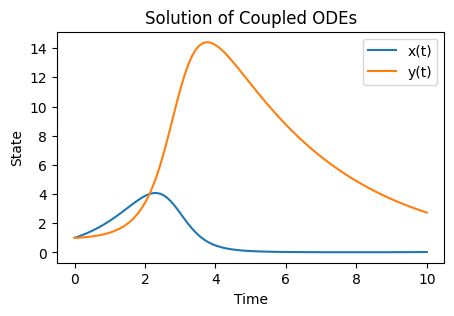

In [4]:
# Plotting results
fig = plt.figure(figsize=(5,3))
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Solution of Coupled ODEs')
plt.show()

# Solve using Euler's Method

In [5]:
Dt = 0.01       # timestep Delta t
X_start = 1     # initial X
Y_start = 1     # initial Y

t_start = 0     # starttime
t_end = 10      # endtime

n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps

In [6]:
X_arr = np.zeros(n_steps + 1)   # create an array of zeros for X
Y_arr = np.zeros(n_steps + 1)   # create an array of zeros for Y
t_arr = np.zeros(n_steps + 1)   # create an array of zeros for t
t_arr[0] = t_start              # add starttime to array
X_arr[0] = X_start              # add initial value of X to array
Y_arr[0] = Y_start              # add initial value of Y to array

In [7]:
# Constants
a = 1.0
b = 0.2
c = 0.3
d = 0.4

In [8]:
# Euler's method
for i in range (1, n_steps + 1):  
    X = X_arr[i - 1]
    Y = Y_arr[i - 1]
    t = t_arr[i - 1]

    dxdt = X * (a - b * Y)    # calculate the derivative of X
    dydt = -Y * (c - d * X)   # calculate the derivative of Y

    X_arr[i] = X + Dt * dxdt  # calc. X at next timestep, add to array
    Y_arr[i] = Y + Dt * dydt  # calc. Y at next timestep, add to array
    t_arr[i] = t + Dt         # add new value of t to array

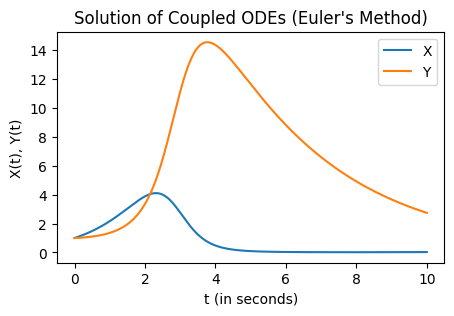

In [9]:
# plotting the result
fig = plt.figure(figsize=(5,3))
plt.title("Solution of Coupled ODEs (Euler's Method)")
plt.plot(t_arr, X_arr, label = 'X')
plt.plot(t_arr, Y_arr, label = 'Y')
plt.xlabel('t (in seconds)')
plt.ylabel('X(t), Y(t)')
plt.legend()
plt.show()